In [1]:
pip install mpl-chord-diagram

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mpl-chord-diagram: filename=mpl_chord_diagram-0.4.1-py2.py3-none-any.whl size=16703 sha256=0054467fd04d7dc8b6675a4ab6d3ea1ae6fd7dd0e9bbff4f34c570a6b924b465
  Stored in directory: c:\users\ruben\appdata\local\pip\cache\wheels\9e\21\1f\4fa385a21756caf2f94398fd032cbaa5c03a0dfdb5edb93cf3
Successfully built mpl-chord-diagram
Note: you may need to restart the kernel to use updated packages.


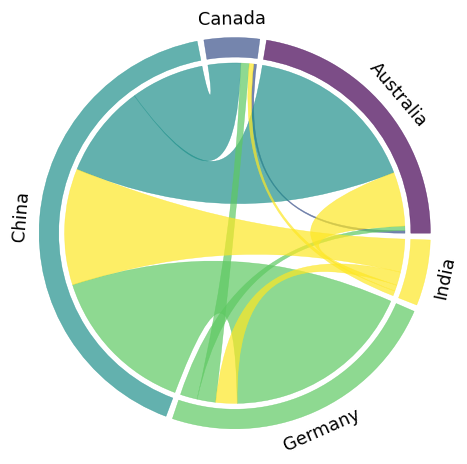

In [6]:
from mpl_chord_diagram import chord_diagram
import matplotlib.pyplot as plt
mat = [
     [0,1459.35,100542.36,2593.79,30991.59],
     [1591.56,0,18764.67,4741.34,2581.97],
     [53509.15,42126.46,0,86997.61,66779.54],
     [9731.9,10667.21,110373,0,12233.01],
     [3465.59,2811.4,18921.63,7657.33,0],
 ]
country_names = ["Australia","Canada","China","Germany","India"]
chord_diagram(mat, names=country_names)
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from chord import Chord  # Asegúrate de tener chord lib: pip install chord

# Cargar el archivo Excel
df = pd.read_excel(r"C:\Users\ruben\Desktop\Instituto Pirenaico de Ecología\FRIAS_ casa\FRIAS_SpeciesList_MasterList.xlsx")

# Separar las fuentes por especie en filas distintas
df_exploded = df.copy()
df_exploded['Source_Data'] = df_exploded['Source_Data'].str.lower()
df_exploded = df_exploded.assign(Source_Data=df_exploded['Source_Data'].str.split(',')).explode('Source_Data')
df_exploded['Source_Data'] = df_exploded['Source_Data'].str.strip()

# Obtener las 5 fuentes más frecuentes
top_5_sources = df_exploded['Source_Data'].value_counts().nlargest(5).index.tolist()

In [20]:
top_5_sources

['griis_2022',
 'easin_2025',
 'tedesco_et_al_2017',
 'usriis_2022',
 'artsdatabankennoruega_2025']

In [21]:
# Crear matriz vacía
mat = np.zeros((5, 5), dtype=int)

# Llenar la matriz con conteos de especies compartidas
for i, src1 in enumerate(top_5_sources):
    species_src1 = set(df_exploded[df_exploded['Source_Data'] == src1]['AcceptedNameGBIF'])
    for j, src2 in enumerate(top_5_sources):
        species_src2 = set(df_exploded[df_exploded['Source_Data'] == src2]['AcceptedNameGBIF'])
        mat[i][j] = len(species_src1 & species_src2)  # intersección

# Mostrar resultados
print("Column names (top 5 sources):")
print(top_5_sources)

print("\nmat (species shared between top 5 sources):")
print(mat)

Column names (top 5 sources):
['griis_2022', 'easin_2025', 'tedesco_et_al_2017', 'usriis_2022', 'artsdatabankennoruega_2025']

mat (species shared between top 5 sources):
[[1569  364  430  217  245]
 [ 364  637  132  132  238]
 [ 430  132  577   72   77]
 [ 217  132   72  510  130]
 [ 245  238   77  130  505]]


<Figure size 1200x1200 with 0 Axes>

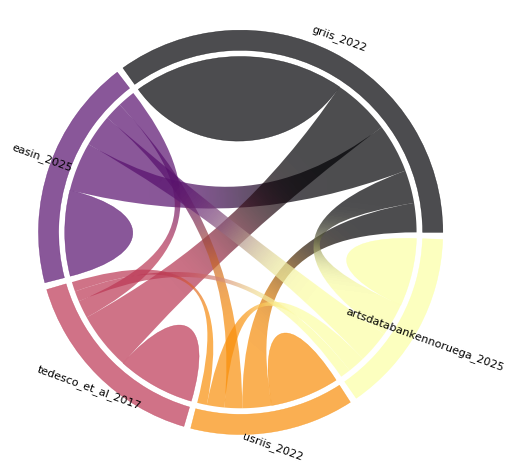

In [80]:
from mpl_chord_diagram import chord_diagram
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 12))

cmap = plt.colormaps['inferno']
colors = [cmap(i) for i in np.linspace(0, 1, len(top_5_sources))]

chord_diagram(
    mat,
    names=top_5_sources,
    use_gradient=True,
    fontsize=8,
    colors=colors
)

for text in plt.gca().texts:
    text.set_rotation(-20)

plt.savefig('chord_diagram_prueba.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1200x1200 with 0 Axes>

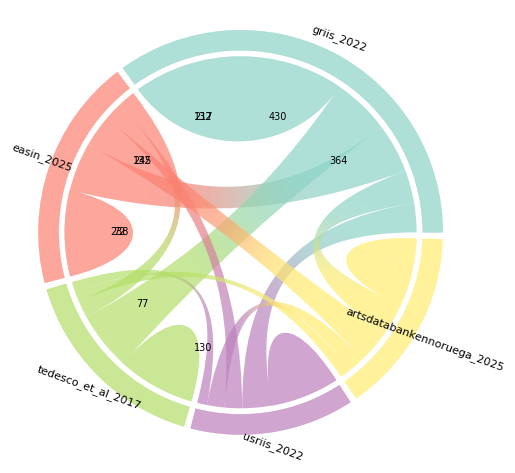

In [51]:
from mpl_chord_diagram import chord_diagram
import matplotlib.pyplot as plt
import numpy as np

# Crear figura
fig = plt.figure(figsize=(12, 12))

# Usar colormap
cmap = plt.colormaps['Set3']
colors = [cmap(i) for i in np.linspace(0, 1, len(top_5_sources))]

# Dibujar chord diagram y guardar arcos (esto requiere una ligera modificación interna de la librería si se quiere hacer bien)
chord_diagram(
    mat,
    names=top_5_sources,
    use_gradient=True,
    fontsize=8,
    colors=colors
)

# Inclinamos los textos
for text in plt.gca().texts:
    text.set_rotation(-20)

# 💡 Añadir valores de mat manualmente en el centro del diagrama (posiciones aproximadas)
# Esta solución simple solo coloca los valores como texto cerca del centro
mid_x, mid_y = 0, 0  # centro del círculo
radius = 1.2         # radio aproximado

# Añadir texto solo para entradas únicas (matriz simétrica)
for i in range(len(top_5_sources)):
    for j in range(i + 1, len(top_5_sources)):
        value = mat[i][j]
        if value > 0:
            angle = (2 * np.pi / len(top_5_sources)) * ((i + j) / 2)
            x = mid_x + radius * 0.5 * np.cos(angle)
            y = mid_y + radius * 0.5 * np.sin(angle)
            plt.text(x, y, str(value), ha='center', va='center', fontsize=7, color='black')

# Mostrar
plt.show()
